In [1]:
from keras.datasets import mnist

In [5]:
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


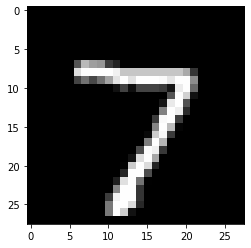

In [6]:
#Example img
plt.imshow(X_test[0],cmap='gray')

In [9]:
X_test.shape

(10000, 28, 28)

In [8]:
X=X_test.reshape(-1,28*28)
Y=y_test

In [10]:
X.shape

(10000, 784)

## Step 1 Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
X_=sc.fit_transform(X)

In [14]:
X_.shape

(10000, 784)

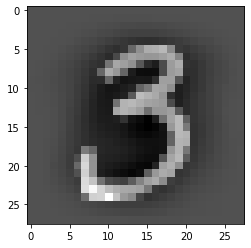

In [17]:
plt.imshow(X_[90].reshape(28,28), cmap='gray')

# Sklearn PCA

In [18]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)

In [30]:
Z_pca=pca.fit_transform(X_)

In [31]:
Z_pca.shape

(10000, 2)

In [32]:
pca.explained_variance_

array([41.39893397, 28.35105677])

In [33]:
Z_pca

array([[-5.45823592,  6.41552281],
       [ 2.80465424, -8.02501605],
       [-7.41125689, -3.86436496],
       ...,
       [-5.00437233,  1.15302464],
       [-1.42094394, -4.42354161],
       [13.14276534, -4.26030486]])

# Custom PCA

In [34]:
import numpy as np

## Step 2 - Computing covariance

Covarinace can also be calculated by Transpose of X * X

In [35]:
covar=np.dot(X_.T,X_)

In [36]:
covar.shape

(784, 784)

# Step 3 Compute eigen vectors using SVD

In [37]:
from numpy.linalg import svd

In [38]:
U,S,V= svd(covar)

The U will give us eigen vectors . We will take the first two eigen vectors which are most relevabt, since we want to get it in 2 dimensions.

In [39]:
Ured=U[:,0:2]
Ured.shape

(784, 2)

## Step 4- Project data on new axis(Components)

In [40]:
Z=np.dot(X_,Ured)
Z.shape

(10000, 2)

In [54]:
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Visualise **Dataset**

In [55]:
import pandas as pd


In [61]:
new_dataset=np.hstack((Z,Y.reshape(-1,1)))

In [63]:
dataframe=pd.DataFrame(new_dataset,columns=["PC1","PC2","Label"])
dataframe

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0
...,...,...,...
9995,-3.579478,3.367965,2.0
9996,-3.244816,1.981771,3.0
9997,5.004352,-1.153646,4.0
9998,1.420854,4.423081,5.0


<Figure size 1080x1080 with 0 Axes>

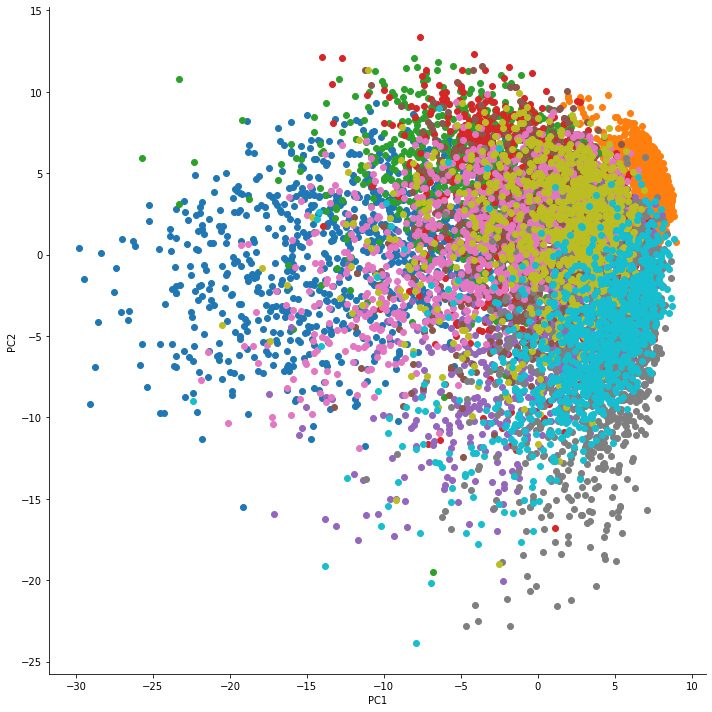

In [65]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue='Label',height=10)
fg.map(plt.scatter,"PC1","PC2")

Pca with